# Support Vector Machine

A support vector machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that separates different classes of data points in a high-dimensional space.

### Import libraries

In [7]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Load the data

In [2]:
data =pd.read_csv('dataset.csv')
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


### Independent and depentend variables

In [3]:
X = np.asarray(data.drop('Survived', axis=1))
y =np.asarray(data['Survived'])

In [6]:
X.shape,y.shape

((891, 9), (891,))

### Train and Test data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 9), (179, 9), (712,), (179,))

### Normalization

The standard scaler, often referred to as Z-score normalization, transforms data to have a mean of zero and a standard deviation of one. This method is widely used in machine learning to ensure that features contribute equally to the model's performance

In [10]:
sc=StandardScaler()

In [11]:
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.transform(X_test)

### Train the Model

In [12]:
model= SVC(kernel='rbf', C=1, gamma=0.9)

In [13]:
model.fit(X_train_normalized,y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,0.9
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Predict

In [14]:
y_pred = model.predict(X_test_normalized)

### Accuracy

In [23]:
accuracy= accuracy_score(y_test,y_pred)
print(f"Model's accuracy: {accuracy:0.2f}")

Model's accuracy: 0.80


### Fine Tune

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [26]:
params = {
    'C':[10,100],
    'gamma':[1,0.9,0.5,0.1,0.001,0.0001],
    'kernel':['rbf']
}

In [28]:
grid= GridSearchCV(SVC(),params,verbose=1)
grid.fit(X_train_normalized,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,SVC()
,param_grid,"{'C': [10, 100], 'gamma': [1, 0.9, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


### Best Parameters

In [35]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [36]:
grid.best_estimator_

,C,10
,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Predict with Best parameters

In [29]:
pred= grid.predict(X_test_normalized)

### Best Parameters Accuracy

In [30]:
accuracy_best= accuracy_score(y_test,pred)
print(f"Best Parameters Model's accuracy: {accuracy:0.2f}")

Best Parameters Model's accuracy: 0.80


### Confusion Matrix

<Axes: >

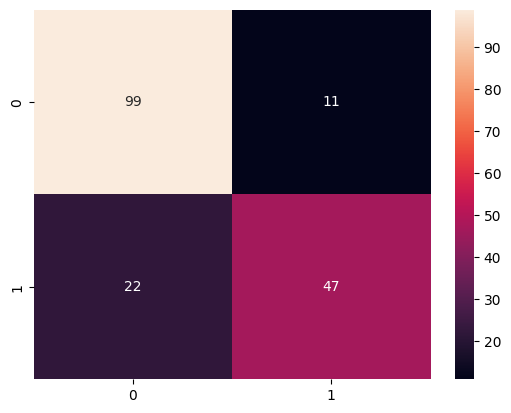

In [34]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True)